In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sqlite3
import gmaps
from config import (gkey)

In [2]:
file = "Fire_Data_Over_1.csv"
df = pd.read_csv(file)

In [3]:
us_df = df.loc[(df.loc[:,'STATE']!='AK') & (df.loc[:,'STATE']!='HI') & (df.loc[:,'STATE']!='PR')]

In [4]:
lat_max = us_df["LATITUDE"].max()
lat_min = us_df["LATITUDE"].min()
lat_interval = (lat_max - lat_min)/3

lon_max = us_df["LONGITUDE"].max()
lon_min = us_df["LONGITUDE"].min()
lon_interval = (lon_max - lon_min)/3


lat_bin = [lat_min, (lat_min + lat_interval), (lat_min + 2*lat_interval), lat_max]
lon_bin = [lon_min, (lon_min + lon_interval), (lon_min + 2*lon_interval), lon_max]

lon_name = ["West", "Central", "East"]
lat_name = ["South", "Central", "North"]

In [5]:
us_df["LON_REGION"] = pd.cut(us_df["LONGITUDE"], lon_bin, labels=lon_name)

C:\Users\levanm1\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [6]:
us_df["LAT_REGION"] = pd.cut(us_df["LATITUDE"], lat_bin, labels=lat_name)
us_df.head()

C:\Users\levanm1\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Unnamed: 0,FOD_ID,FIRE_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,COUNTY,LON_REGION,LAT_REGION
0,13,14,TIGER,2004,2453276.5,272,1200.0,4.0,Campfire,6.0,B,38.433333,-120.510000,CA,5,West,Central
1,16,17,POWER,2004,2453284.5,280,1415.0,2.0,Equipment Use,16823.0,G,38.523333,-120.211667,CA,5,West,Central
2,17,18,FREDS,2004,2453291.5,287,1618.0,2.0,Equipment Use,7700.0,G,38.780000,-120.260000,CA,17,West,Central
3,24,25,EAGLE,2004,2453187.5,183,1712.0,1.0,Lightning,2.5,B,33.545278,-105.229444,NM,27,Central,Central
4,25,26,BACHELOR,2004,2453206.5,202,1405.0,1.0,Lightning,10.0,C,33.315833,-105.512222,NM,27,West,Central


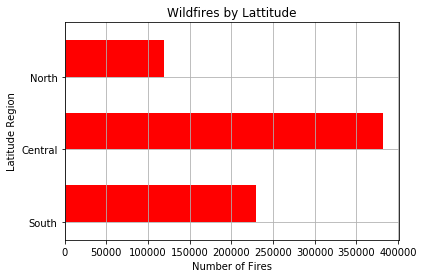

In [14]:
lat_df = us_df.groupby("LAT_REGION")
lat_list_bar = lat_df.FOD_ID.count()

lat_list_bar.plot(kind="barh", facecolor="red", align="edge")
plt.title("Wildfires by Lattitude")
plt.xlabel("Number of Fires")
plt.ylabel("Latitude Region")
plt.grid()
plt.savefig("Wildfires_By_Latitude.png", bbox_inches="tight")
plt.show()

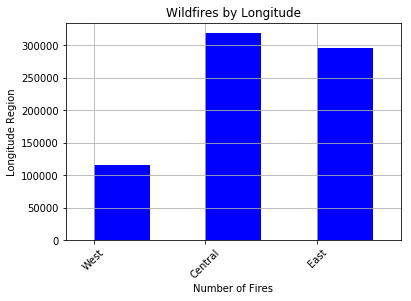

In [23]:
lon_df = us_df.groupby("LON_REGION")
lon_list_bar = lon_df.FOD_ID.count()
lon_list_bar.plot(kind="bar", facecolor="blue", align="edge")
plt.title("Wildfires by Longitude")
plt.xlabel("Number of Fires")
plt.ylabel("Longitude Region")
plt.grid()
plt.xticks(rotation=45)
plt.savefig("Wildfires_By_Longitude.png", bbox_inches="tight")
plt.show()

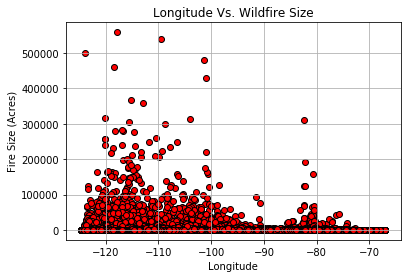

In [16]:
plt.scatter(us_df["LONGITUDE"], us_df["FIRE_SIZE"], marker="o", facecolors="red", edgecolors="black")
plt.title("Longitude Vs. Wildfire Size")
plt.xlabel("Longitude")
plt.ylabel("Fire Size (Acres)")
plt.grid()
plt.savefig("Longitude_Vs_Wildfire_Size.png", bbox_inches="tight")
plt.show()

In [ ]:
# Configure gmaps with API key
gmaps.configure(api_key=gkey)
# Store 'Lat' and 'Lng' into  locations 
locations = us_df[["LATITUDE", "LONGITUDE"]].astype(float)

# Convert Poverty Rate to float and store
# HINT: be sure to handle NaN values
fire_size = us_df["FIRE_SIZE"].astype(float)

In [ ]:
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=fire_size, 
                                 dissipating=False, max_intensity=558198,
                                 point_radius = 1)

# Adjust heat_layer setting to help with heatmap dissipating on zoom
heat_layer.dissipating = False
heat_layer.max_intensity = 558198
heat_layer.point_radius = 1

fig.add_layer(heat_layer)

fig

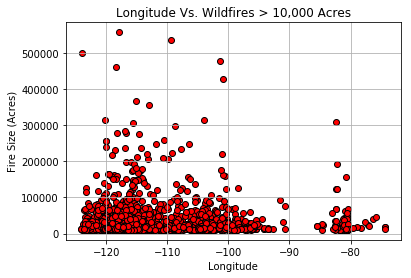

In [17]:
larger = us_df.loc[us_df["FIRE_SIZE"]>10000,:]
larger
plt.scatter(larger["LONGITUDE"], larger["FIRE_SIZE"], marker="o", facecolors="red", edgecolors="black")
plt.title("Longitude Vs. Wildfires > 10,000 Acres")
plt.xlabel("Longitude")
plt.ylabel("Fire Size (Acres)")
plt.grid()
plt.savefig("Lng_vs_fire_gtrtenk.png", bbox_inches="tight")
plt.show()

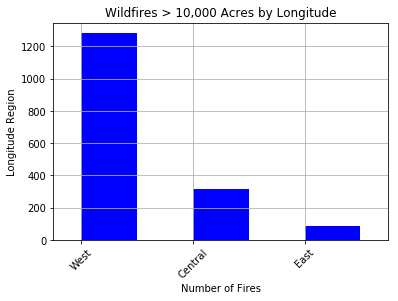

In [24]:
lon_df = larger.groupby("LON_REGION")
lon_list_bar = lon_df.FOD_ID.count()
lon_list_bar.plot(kind="bar", facecolor="blue", align="edge")
plt.title("Wildfires > 10,000 Acres by Longitude")
plt.xlabel("Number of Fires")
plt.ylabel("Longitude Region")
plt.grid()
plt.xticks(rotation=45)
plt.savefig("Fire_grt_tenK_vs_lon.png", bbox_inches="tight", pad_inches=0.5)
plt.show()

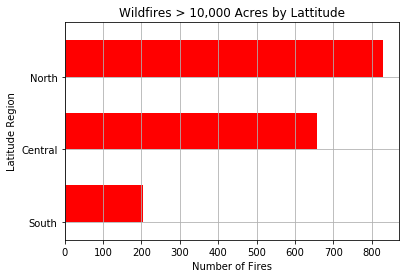

In [18]:
lat_df = larger.groupby("LAT_REGION")
lat_list_bar = lat_df.FOD_ID.count()

lat_list_bar.plot(kind="barh", facecolor="red", align="edge")
plt.title("Wildfires > 10,000 Acres by Lattitude")
plt.xlabel("Number of Fires")
plt.ylabel("Latitude Region")
plt.grid()
plt.savefig("Fire_grt_tenK_vs_lat.png", bbox_inches="tight")
plt.show()